### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (15, 12)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer

### Load Data

In [3]:
bank_adt = pd.read_csv('dataset/bank-additional.csv', sep=';', na_values=['unknown'])
bank_adt_full = pd.read_csv('dataset/bank-additional-full.csv', sep=';',  na_values=['unknown'])

In [4]:
df_bank = pd.concat([bank_adt, bank_adt_full]) # concat 2 dataframe (bank_adt dan bank_adt_full)

**bank client data:**
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**related with the last contact of the current campaign:**

- contact: contact communication type (categorical: 'cellular', 'telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**social and economic context attributes**

- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


In [5]:
df_bank.shape # Lihat dimension dataframe

(45307, 21)

In [6]:
df_bank.head() # Lima data pertama dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
df_bank.info() # Cek data type dari setiap kolom di dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45307 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             44938 non-null  object 
 2   marital         45216 non-null  object 
 3   education       43409 non-null  object 
 4   default         35907 non-null  object 
 5   housing         44212 non-null  object 
 6   loan            44212 non-null  object 
 7   contact         45307 non-null  object 
 8   month           45307 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        45307 non-null  int64  
 11  campaign        45307 non-null  int64  
 12  pdays           45307 non-null  int64  
 13  previous        45307 non-null  int64  
 14  poutcome        45307 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   45307 non-null 

In [8]:
categorical = df_bank.select_dtypes(include=['object']).columns.tolist() # kolom-kolom yang bertipe object 
numerical = df_bank.select_dtypes(exclude=['object']).columns.tolist() # kolom-kolom yang bertipe int, float 

In [9]:
# Values counts untuk setiap kolom di list categorical -> kolom-kolom yang bertipe object 
for cat in categorical:
    print(cat, ':')
    print(df_bank[cat].value_counts())
    print('')

job :
admin.           11434
blue-collar      10138
technician        7434
services          4362
management        3248
retired           1886
entrepreneur      1604
self-employed     1580
housemaid         1170
unemployed        1125
student            957
Name: job, dtype: int64

marital :
married     27437
single      12721
divorced     5058
Name: marital, dtype: int64

education :
university.degree      13432
high.school            10436
basic.9y                6619
professional.course     5778
basic.4y                4605
basic.6y                2520
illiterate                19
Name: education, dtype: int64

default :
no     35903
yes        4
Name: default, dtype: int64

housing :
yes    23751
no     20461
Name: housing, dtype: int64

loan :
no     37299
yes     6913
Name: loan, dtype: int64

contact :
cellular     28796
telephone    16511
Name: contact, dtype: int64

month :
may    15147
jul     7885
aug     6814
jun     5848
nov     4547
apr     2847
oct      787
sep      634

### Data Cleaning

In [10]:
df_bank.isnull().sum() # cek null/missing values

age                  0
job                369
marital             91
education         1898
default           9400
housing           1095
loan              1095
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [11]:
# delete missing value
df_bank.dropna(subset=['default', 'education', 'housing', 'loan', 'job', 'marital'], inplace=True)

In [12]:
df_bank.duplicated().sum() # cek duplikat

3100

In [13]:
df_bank.drop_duplicates(inplace=True) # delete duplikat
df_bank.duplicated().sum()

0

### Eksplorasi Data

In [14]:
df_bank_copy = df_bank.copy() # copy original dataframe ke dataframe baru untuk melakukan eksplorasi data

In [15]:
df_bank_copy # dataframe hasil copy

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


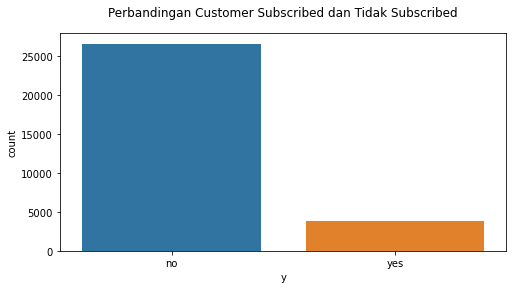

In [16]:
# membuat grafik batang yang menunjukkan perbandingan NO dan YES dari kolom target
plt.figure(figsize=(8,4))
sns.countplot(x='y', data=df_bank_copy)
plt.title('Perbandingan Customer Subscribed dan Tidak Subscribed', y=1.05)
plt.xlabel('y')
plt.show()

**Dari plot di atas dapat diketahui bahwa dataset yang dimiliki ini imbalance dimana mayoritas datanya adalah customer yang tidak subscribed**

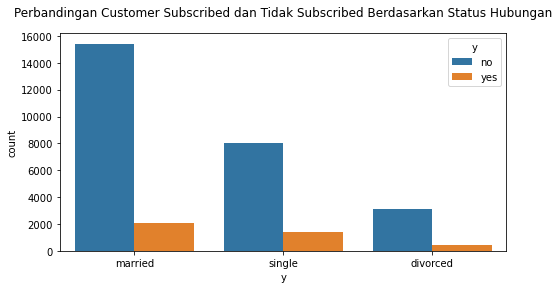

In [17]:
# membuat grafik batang yang menunjukkan perbandingan value kolom target berdasarkan statusnya (marital)
plt.figure(figsize=(8,4))
sns.countplot(x=df_bank_copy['marital'], hue=df_bank_copy['y'])
plt.title('Perbandingan Customer Subscribed dan Tidak Subscribed Berdasarkan Status Hubungan', y=1.05)
plt.xlabel('y')
plt.show()

**Berdasarkan plot di atas ternyata mayoritas client yang subscribed term deposit memiliki status married**

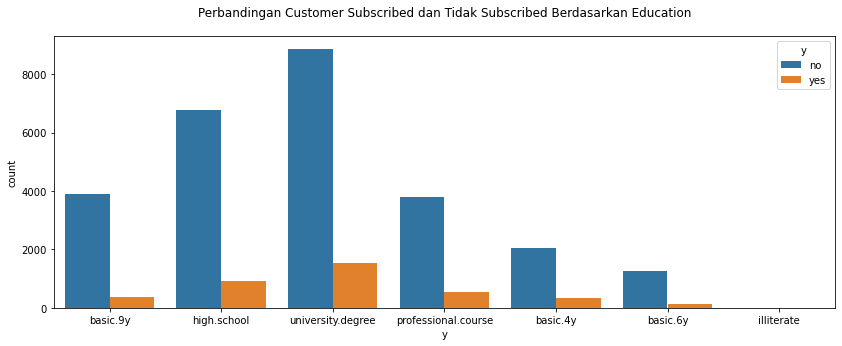

In [18]:
# membuat grafik batang yang menunjukkan perbandingan value kolom target berdasarkan edukasinya
plt.figure(figsize=(14,5))
sns.countplot(x=df_bank_copy['education'], hue=df_bank_copy['y'])
plt.title('Perbandingan Customer Subscribed dan Tidak Subscribed Berdasarkan Education', y=1.05)
plt.xlabel('y')
plt.show()

In [19]:
# menghitung banyaknya value YES pada kolom target
total_yes = len(df_bank_copy[df_bank_copy['y'] == 'yes'])

# menghitung banyaknya value YES pada kolom target dan edukasinya  university degree
edu_univ_yes = len(df_bank_copy[(df_bank_copy['y'] == 'yes') & (df_bank_copy['education'] == 'university.degree')])

# menghitung persentase customer yang edukasi university degree dan subscribed term deposit
percent_univ_yes = edu_univ_yes/total_yes
percent_univ_yes

0.39942975635044065

**Customer yang edukasinya university degree merupakan customer yang subscribed term deposit terbanyak yaitu sebesar 39% dari total keseluruhan customer yang subscribed**

<Figure size 1440x720 with 0 Axes>

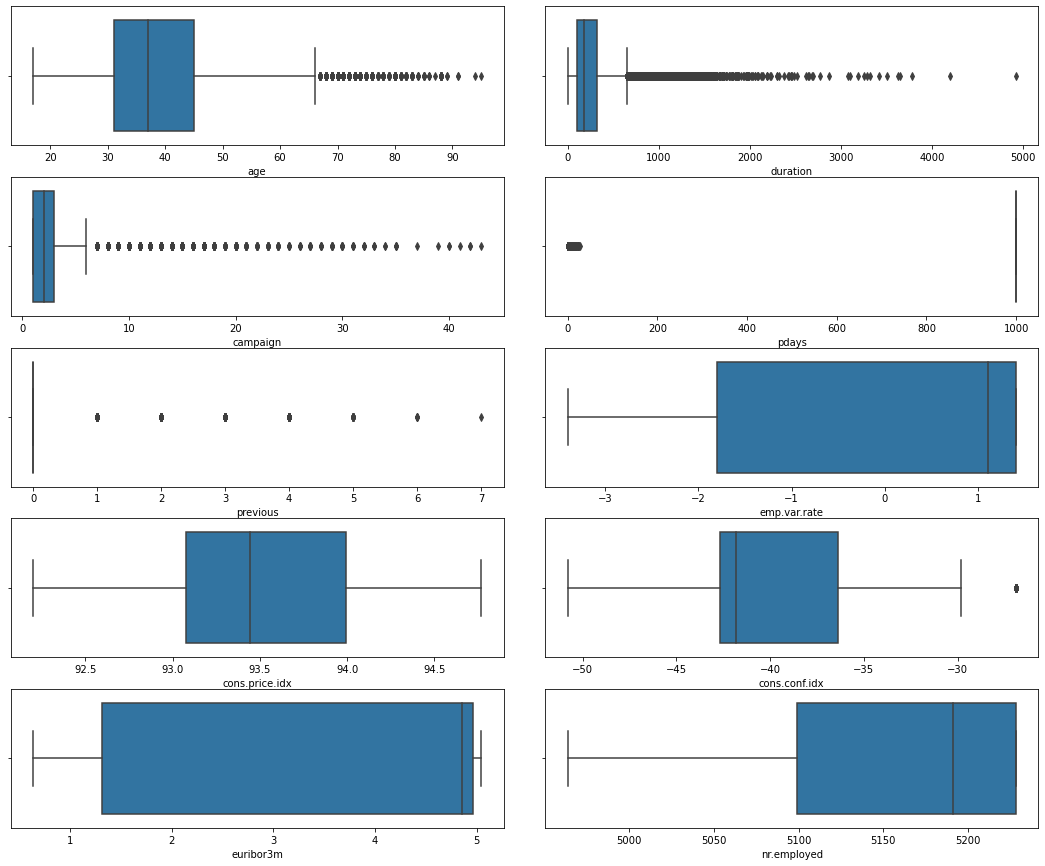

In [20]:
# Membuat grafik box untuk melihat distribusi dari setiap kolom numerical list
plt.figure(figsize=(20,10))
fig, axes = plt.subplots(ncols=2, nrows=5)
fig.tight_layout()
for i, ax in zip(numerical, axes.flat):
    sns.boxplot(x=df_bank_copy[i],ax=ax)
plt.show()

**Berdasarkan plot didapat bahwa fitur age, campaign, duration, pdays, previous, dan cons.conf.idx memiliki data outlier dan semuanya skew**

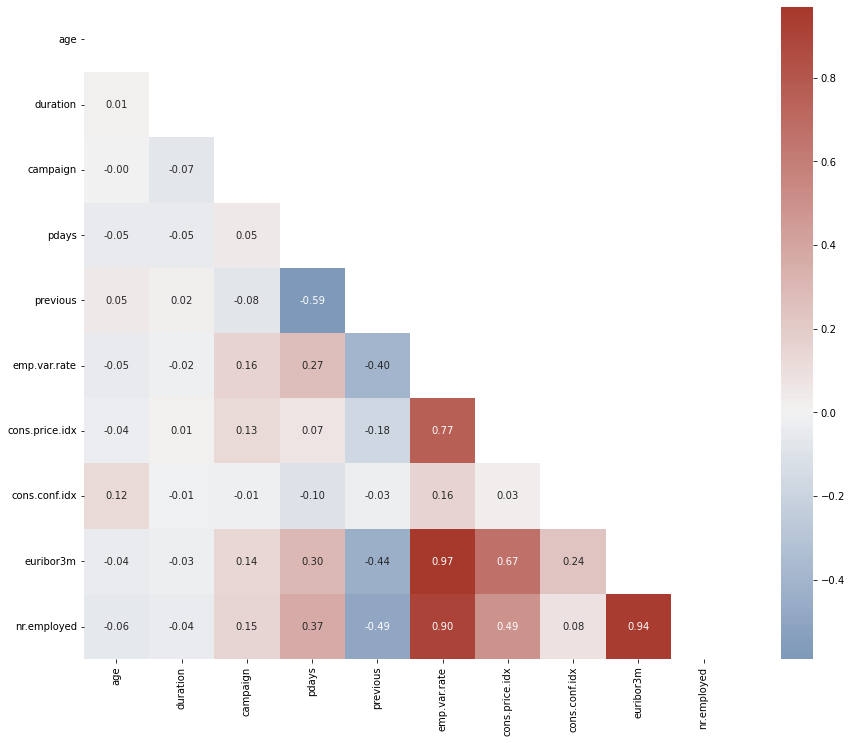

In [21]:
df_corr = df_bank_copy.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(df_corr, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()

**Dari heatmap di atas dapat dilihat bahwa terdapat beberapa fitur yang berkorelasi dengan fitur lainnya yang berarti tidak independen maka kita dapat mendrop salah satu fitur dari dua fitur yang berkorelasi tersebut. Di kasus ini kita akan mendrop 'euribor3m', 'nr.employed', 'cons.price.idx'**

### Data Preprocessing

In [22]:
# mendefinisikan labelencoder
le = LabelEncoder()

# mendefinisikan list yang berisi kolom yang akan diganti menjadi label
le_cols = ['job', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']
for col in le_cols:
    df_bank[col] = le.fit_transform(df_bank[col]) # mengganti categorical object dengan labelencoder agar menjadi numerik

In [23]:
# mengganti categorical object edukasi di dataframe sesuai dengan dict edu
edu = {'illiterate': 0, 'basic.4y':1, 'basic.6y':1, 'basic.9y':1, 'high.school':2, 'professional.course':3, 'university.degree':4}
df_bank['education'] = df_bank['education'].map(edu)

In [24]:
# mengganti categorical object marital di dataframe sesuai dengan dict marital
marital = {'single': 0, 'married':1, 'divorced':2}
df_bank['marital'] = df_bank['marital'].map(marital)

In [25]:
# mengganti categorical object month di dataframe sesuai dengan dict month
month = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11}
df_bank['month'] = df_bank['month'].map(month)

In [26]:
# mengganti categorical object day_of_week di dataframe sesuai dengan dict dayofweek
dayofweek = {'mon': 0, 'tue': 1, 'wed': 2, 'thu':3, 'fri':4}
df_bank['day_of_week'] = df_bank['day_of_week'].map(dayofweek)

In [27]:
# delete fitur yang berkorelasi tinggi dengan fitur lainnya
df_bank.drop(['euribor3m', 'nr.employed', 'cons.price.idx'], axis=1, inplace=True)

In [28]:
# dimensi dataframe
df_bank.shape

(30478, 18)

In [29]:
X = df_bank.iloc[:,:-1] # memisahkan kolom selain y (fitur-fitur) ke X 
y = df_bank['y'] # memisalhkan kolom y (target) ke y

In [30]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 1)

In [31]:
# dimension dari X_train dan X_test
X_train.shape, X_test.shape

((21334, 17), (9144, 17))

In [32]:
# menghitung banyaknya value 0 dan 1 pada y_train
from collections import Counter
Counter(y_train)

Counter({0: 18595, 1: 2739})

In [33]:
# melakukan undersampling karena datasetnya imbalanced dengan menggunakan randomundersampling
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
under_X_train, under_y_train = undersampler.fit_resample(X_train, y_train)

In [34]:
# menghitung banyaknya value 0 dan 1 pada under_y_train (under sampling)
Counter(under_y_train)

Counter({0: 2739, 1: 2739})

In [35]:
# melakukan oversampling karena datasetnya imbalanced dengan menggunakan SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
over_X_train, over_y_train = sm.fit_resample(X_train,y_train)

In [36]:
# menghitung banyaknya value 0 dan 1 pada over_y_train (over sampling)
Counter(over_y_train)

Counter({0: 18595, 1: 18595})

In [37]:
# mendefinisikan scaling yang digunakan
scaler = StandardScaler()

In [38]:
X_train_un = scaler.fit_transform(X_train) # scaling X_train
under_X_train = scaler.fit_transform(under_X_train) # scaling under_X_train
over_X_train = scaler.fit_transform(over_X_train) # scaling over_X_train

In [39]:
X_test = scaler.transform(X_test) # scaling X_test

### Modeling

Modeling pada dataset yang imbalanced

#### Logistic Regression

In [40]:
# membuat LogisticRegression dengan class_weightnya balanced
model_lr = LogisticRegression(class_weight='balanced')
# train model dengan data train
model_lr.fit(X_train_un, y_train)

LogisticRegression(class_weight='balanced')

In [41]:
# predict X_test
y_pred_lr = model_lr.predict(X_test)

In [42]:
# confusion matrix yang menunjukkan nilai TN, FP, FN, TP dari y_test (actual) dengan hasil prediksi (predict)
confusion_matrix(y_test, y_pred_lr)

array([[7589,  436],
       [ 515,  604]], dtype=int64)

In [43]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8025
           1       0.58      0.54      0.56      1119

    accuracy                           0.90      9144
   macro avg       0.76      0.74      0.75      9144
weighted avg       0.89      0.90      0.89      9144



#### KNN

In [44]:
# membuat KNeighborsClassifier dengan n_neighbors 11
knn_model = KNeighborsClassifier(n_neighbors=11)
# train model dengan data train
knn_model.fit(X_train_un, y_train)

KNeighborsClassifier(n_neighbors=11)

In [45]:
# predict X_test
y_pred_knn = knn_model.predict(X_test)

In [46]:
# confusion matrix yang menunjukkan nilai TN, FP, FN, TP dari y_test (actual) dengan hasil prediksi (predict)
confusion_matrix(y_test, y_pred_knn)

array([[7884,  141],
       [ 837,  282]], dtype=int64)

In [47]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8025
           1       0.67      0.25      0.37      1119

    accuracy                           0.89      9144
   macro avg       0.79      0.62      0.65      9144
weighted avg       0.87      0.89      0.87      9144



#### Decision Tree Classifier

In [48]:
# membuat DecisionTreeClassifier dengan max_depth 10 dan max_features auto
dtc_model = DecisionTreeClassifier(max_depth=10, max_features='auto')
# train model dengan data train
dtc_model.fit(X_train_un, y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto')

In [49]:
# predict X_test
y_pred_dtc = dtc_model.predict(X_test)

In [50]:
# confusion matrix yang menunjukkan nilai TN, FP, FN, TP dari y_test (actual) dengan hasil prediksi (predict)
confusion_matrix(y_test, y_pred_dtc)

array([[7866,  159],
       [ 810,  309]], dtype=int64)

In [51]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8025
           1       0.66      0.28      0.39      1119

    accuracy                           0.89      9144
   macro avg       0.78      0.63      0.67      9144
weighted avg       0.88      0.89      0.87      9144



#### Random Forest Classifier

In [52]:
# membuat RandomForestClassifier dengan max_features auto
rfc_model = RandomForestClassifier(max_features='auto')
# train model dengan data train
rfc_model.fit(X_train_un, y_train)

RandomForestClassifier()

In [53]:
# predict X_test
y_pred_rfc = rfc_model.predict(X_test)
# confusion matrix yang menunjukkan nilai TN, FP, FN, TP dari y_test (actual) dengan hasil prediksi (predict)
confusion_matrix(y_test, y_pred_rfc)

array([[7885,  140],
       [ 792,  327]], dtype=int64)

In [54]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8025
           1       0.70      0.29      0.41      1119

    accuracy                           0.90      9144
   macro avg       0.80      0.64      0.68      9144
weighted avg       0.88      0.90      0.88      9144



#### SVM

In [55]:
# membuat SVC
svc_model = SVC()
# train model dengan data train
svc_model.fit(X_train_un, y_train)

SVC()

In [56]:
# predict X_test
y_pred_svc = svc_model.predict(X_test)
# confusion matrix yang menunjukkan nilai TN, FP, FN, TP dari y_test (actual) dengan hasil prediksi (predict)
confusion_matrix(y_test, y_pred_svc)

array([[7942,   83],
       [ 907,  212]], dtype=int64)

In [57]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8025
           1       0.72      0.19      0.30      1119

    accuracy                           0.89      9144
   macro avg       0.81      0.59      0.62      9144
weighted avg       0.88      0.89      0.86      9144



modeling dengan under sampling dataset

#### Naive Bayes

In [58]:
# membuat GaussianNB
gnb_model = GaussianNB()
# train model dengan data train
gnb_model.fit(X_train_un, y_train)

GaussianNB()

In [59]:
# predict X_test
y_pred_gnb = gnb_model.predict(X_test)
# confusion matrix yang menunjukkan nilai TN, FP, FN, TP dari y_test (actual) dengan hasil prediksi (predict)
confusion_matrix(y_test, y_pred_gnb)

array([[8025,    0],
       [1119,    0]], dtype=int64)

In [60]:
# cek prediksi 1
y_pred_gnb[y_pred_gnb == 1]

array([], dtype=int32)

In [61]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      8025
           1       0.00      0.00      0.00      1119

    accuracy                           0.88      9144
   macro avg       0.44      0.50      0.47      9144
weighted avg       0.77      0.88      0.82      9144



C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### UnderSampling Logistic Regression

In [62]:
# mendefinisikan hyperparameter tuning
param_grid = {
    "C":[0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
    "class_weight":[{0:1,1:1.5}, {0:0.5,1:0.75}]
}
# membuat LogisticRegression dengan GridSearchCV
clf_lr = GridSearchCV(LogisticRegression(random_state=0), param_grid=param_grid, cv=10, scoring=make_scorer(f1_score))

In [63]:
# train model dengan data train dan cek best_estimatornya
clf_lr.fit(under_X_train, under_y_train)
clf_lr.best_estimator_

LogisticRegression(C=0.05, class_weight={0: 1, 1: 1.5}, random_state=0)

In [64]:
# predict X_test
y_pred_clf_lr = clf_lr.predict(X_test)

In [65]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_clf_lr))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      8025
           1       0.37      0.89      0.53      1119

    accuracy                           0.80      9144
   macro avg       0.68      0.84      0.70      9144
weighted avg       0.91      0.80      0.83      9144



#### UnderSampling KNN

In [66]:
# mendefinisikan hyperparameter tuning
param_grid_knn = {
    'n_neighbors' : [x for x in range(3,10,2)],
    'metric' : ['euclidean']
}
# membuat KNeighborsClassifier dengan GridSearchCV
clf_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=10, scoring=make_scorer(f1_score))

In [67]:
# train model dengan data train dan cek best_estimatornya
clf_knn.fit(under_X_train, under_y_train)
clf_knn.best_estimator_

KNeighborsClassifier(metric='euclidean')

In [68]:
# predict X_test
y_pred_clf_knn = clf_knn.predict(X_test)

In [69]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_clf_knn))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      8025
           1       0.39      0.78      0.52      1119

    accuracy                           0.82      9144
   macro avg       0.68      0.80      0.71      9144
weighted avg       0.89      0.82      0.85      9144



#### UnderSampling Decision Tree

In [70]:
# mendefinisikan hyperparameter tuning
param_grid_dtc = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [10,30,50,70],
    'min_samples_split': [2, 3, 4],
}
# membuat DecisionTreeClassifier dengan GridSearchCV
clf_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dtc, cv=10, scoring=make_scorer(f1_score))

In [71]:
# train model dengan data train dan cek best_estimatornya
clf_dtc.fit(under_X_train, under_y_train)
clf_dtc.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3)

In [72]:
# predict X_test
y_pred_clf_dtc = clf_dtc.predict(X_test)

In [73]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_clf_dtc))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8025
           1       0.44      0.86      0.58      1119

    accuracy                           0.85      9144
   macro avg       0.71      0.85      0.74      9144
weighted avg       0.91      0.85      0.87      9144



#### UnderSampling Random Forest

In [74]:
# mendefinisikan hyperparameter tuning
param_grid_rfc = {
    'bootstrap': [True],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [10, 20, 50],
    'min_samples_split': [2, 3, 4],
}
# membuat RandomForestClassifier dengan GridSearchCV
clf_rfc = GridSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1), param_grid=param_grid_rfc, cv=10, scoring=make_scorer(f1_score))

In [75]:
# train model dengan data train dan cek best_estimatornya
clf_rfc.fit(under_X_train, under_y_train)
clf_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1,
                       random_state=0)

In [76]:
# predict X_test
y_pred_clf_rfc = clf_rfc.predict(X_test)

In [77]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_clf_rfc))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      8025
           1       0.43      0.93      0.59      1119

    accuracy                           0.84      9144
   macro avg       0.71      0.88      0.74      9144
weighted avg       0.92      0.84      0.86      9144



#### UnderSampling SVC

In [78]:
# membuat SVC untuk undersampling
svc_under_model = SVC()
# train model dengan data train
svc_under_model.fit(under_X_train, under_y_train)

SVC()

In [79]:
# predict X_test
y_pred_under_svc = svc_under_model.predict(X_test)

In [80]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_under_svc))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8025
           1       0.40      0.89      0.56      1119

    accuracy                           0.83      9144
   macro avg       0.69      0.85      0.72      9144
weighted avg       0.91      0.83      0.85      9144



#### UnderSampling Naive Bayes

In [81]:
# membuat GaussianNB untuk undersampling
gnb_under_model = GaussianNB()
# train model dengan data train
gnb_under_model.fit(under_X_train, under_y_train)

GaussianNB()

In [82]:
# predict X_test
y_pred_under_gnb = gnb_under_model.predict(X_test)

In [83]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_under_gnb))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      8025
           1       0.35      0.60      0.45      1119

    accuracy                           0.82      9144
   macro avg       0.65      0.72      0.67      9144
weighted avg       0.87      0.82      0.84      9144



Modeling dengan over sampling dataset

#### OverSampling Logistic Regression

In [84]:
# membuat LogisticRegression dengan GridSearchCV
clf_lr_over = GridSearchCV(LogisticRegression(random_state=0), param_grid=param_grid, cv=10, scoring=make_scorer(f1_score))

In [85]:
# train model dengan data train dan cek best_estimatornya
clf_lr_over.fit(over_X_train, over_y_train)
clf_lr_over.best_estimator_

LogisticRegression(C=0.5, class_weight={0: 1, 1: 1.5}, random_state=0)

In [86]:
# predict X_test
y_pred_clf_lr_over = clf_lr_over.predict(X_test)

In [87]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_clf_lr_over))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      8025
           1       0.40      0.77      0.52      1119

    accuracy                           0.83      9144
   macro avg       0.68      0.80      0.71      9144
weighted avg       0.89      0.83      0.85      9144



#### OverSampling KNN

In [88]:
# membuat KNeighborsClassifier dengan GridSearchCV
clf_knn_over = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=10, scoring=make_scorer(f1_score))

In [89]:
# train model dengan data train dan cek best_estimatornya
clf_knn_over.fit(over_X_train, over_y_train)
clf_knn_over.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [90]:
# predict X_test
y_pred_clf_knn_over = clf_knn.predict(X_test)

In [91]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_clf_knn_over))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      8025
           1       0.39      0.78      0.52      1119

    accuracy                           0.82      9144
   macro avg       0.68      0.80      0.71      9144
weighted avg       0.89      0.82      0.85      9144



#### OverSampling Decision Tree Classifier

In [92]:
# membuat DecisionTreeClassifier dengan GridSearchCV
clf_dtc_over = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dtc, cv=10, scoring=make_scorer(f1_score))

In [93]:
# train model dengan data train dan cek best_estimatornya
clf_dtc_over.fit(over_X_train, over_y_train)
clf_dtc_over.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=70)

In [94]:
# predict X_test
y_pred_clf_dtc_over = clf_dtc_over.predict(X_test)

In [95]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_clf_dtc_over))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8025
           1       0.50      0.54      0.52      1119

    accuracy                           0.88      9144
   macro avg       0.72      0.73      0.72      9144
weighted avg       0.88      0.88      0.88      9144



#### OverSampling Random Forest

In [96]:
# membuat RandomForestClassifier dengan GridSearchCV
clf_rfc_over = GridSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1), param_grid=param_grid_rfc, cv=10, scoring=make_scorer(f1_score))

In [97]:
# train model dengan data train dan cek best_estimatornya
clf_rfc_over.fit(over_X_train, over_y_train)
clf_rfc_over.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=50, n_jobs=-1,
                       random_state=0)

In [98]:
# predict X_test
y_pred_clf_rfc_over = clf_rfc_over.predict(X_test)

In [99]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_clf_rfc_over))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8025
           1       0.59      0.63      0.61      1119

    accuracy                           0.90      9144
   macro avg       0.77      0.78      0.78      9144
weighted avg       0.90      0.90      0.90      9144



#### OverSampling SVC

In [100]:
# membuat SVC untuk oversampling
svc_over_model = SVC()
# train model dengan data train
svc_over_model.fit(over_X_train, over_y_train)

SVC()

In [101]:
# predict X_test
y_pred_over_svc = svc_over_model.predict(X_test)

In [102]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_over_svc))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      8025
           1       0.48      0.67      0.56      1119

    accuracy                           0.87      9144
   macro avg       0.72      0.79      0.74      9144
weighted avg       0.89      0.87      0.88      9144



#### OverSampling Naive Bayes

In [103]:
# membuat GaussianNB untuk oversampling
gnb_over_model = GaussianNB()
# train model dengan data train
gnb_over_model.fit(over_X_train, over_y_train)

GaussianNB()

In [104]:
# predict X_test
y_pred_over_gnb = gnb_over_model.predict(X_test)

In [105]:
# classification report yang menunjukkan skor precision, recall, f1_score, dan akurasi
print(classification_report(y_test, y_pred_over_gnb))

              precision    recall  f1-score   support

           0       0.97      0.33      0.49      8025
           1       0.16      0.93      0.28      1119

    accuracy                           0.40      9144
   macro avg       0.57      0.63      0.38      9144
weighted avg       0.87      0.40      0.46      9144



Evaluasi data testing disini menggunakan f1 score karena Kita tidak mau model salah prediksi sehingga kita perlu memperkecil FN dan FP/ skor precision dan recallnya harus tinggi. Tetapi ini juga dapat direpresentasikan dengan f1 score karena pada model-model yang telah dibangun di atas beberapanya memang memiliki precision yang tinggi hanya saja recallnya sangat kecil sehingga f1 scorenya pun juga kecil. Begitu juga dengan model yang memiliki recall yang tinggi tapi precisionnya rendah. Sehingga menurut saya f1 score lebih dapat merepresentasikan skor yang sebenarnya. Berdasarkan eksplorasi pada dataset ini, model dengan f1 score tertinggi adalah model dengan algoritma learning random forest karena hasil evaluasi dengan data testnya mencapai 61% persen. Hyperparameter yang digunakan pada model ini adalah criterion='entropy', max_depth=50, n_jobs=-1, dan random_state=0.